In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from kfsims.common import init_trajectory
from kfsims.node import observe_factory

In [3]:
import numpy as np

In [4]:
traj = init_trajectory()

In [5]:
iterme = observe_factory(traj.Y.T + np.random.normal(size=traj.Y.shape).T * 10 )()

In [6]:
my_filter = KalmanFilter(dim_x=4, dim_z=2)

In [7]:
get_some_measurement = lambda: next(iterme)

In [8]:
my_filter.x = np.array([[0],
                [0],
                       [1],
                       [1]])       # initial state (location and velocity)

my_filter.F = traj.A

my_filter.H = traj.H
my_filter.P = 100 * np.eye(4)
my_filter.R = traj.R
my_filter.Q = traj.Q

In [9]:
rec = []
while True:
    my_filter.predict()
    my_filter.update(get_some_measurement())

    # do something with the output
    x = my_filter.x
    rec.append(x)

StopIteration: 

In [10]:
np.mean(np.sqrt((np.array(rec)[:, :, 0] - traj.X.T) ** 2))

3.1898661819469907

In [11]:
import matplotlib.pylab as plt
%matplotlib inline

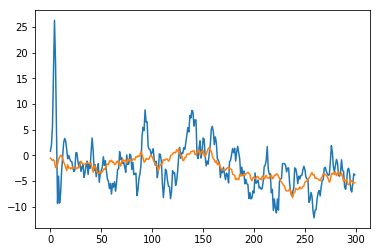

In [12]:
plt.plot(np.array(rec)[:, 3, 0])
plt.plot(np.array(traj.X.T[:, 3]))

In [13]:
np.save('/home/dan/tst.np', np.array(rec))